In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
boston = load_boston()
dir(boston)

data = pd.DataFrame(boston.data, columns=boston.feature_names)
target = pd.DataFrame(boston.target, columns=["Target"])
#데이터 프레임 결합이라는데 이게 뭐하는건지 모르겠음...
df = pd.concat([data, target], axis=1)
df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


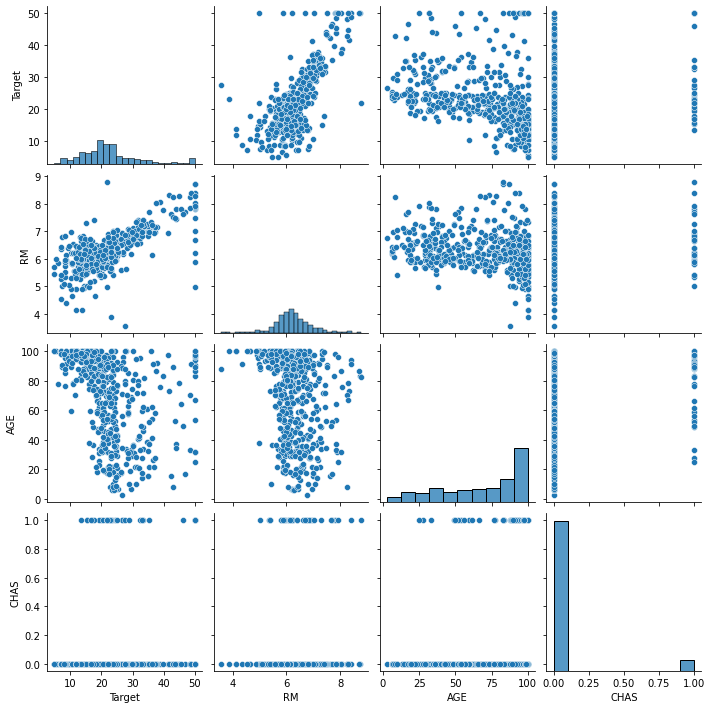

In [29]:
sns.pairplot(df[["Target", "RM", "AGE", "CHAS"]])
plt.show()
#집 나이와 가격은 상관관계가 없다고 한다.

In [30]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [31]:
#결측값 없는 좋은 데이터
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Target     0
dtype: int64

In [32]:
#Target 변수와 상관관계가 높은 순으로 출력해준다.
corr_order = df.corr().loc[:'LSTAT', 'Target'].abs().sort_values(ascending=False)
corr_order

#뭔 뜻인지 잘 모르겠지만
#젤 높은거 LSTAT, RM, PTRATIO, INDUS

LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.388305
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
Name: Target, dtype: float64

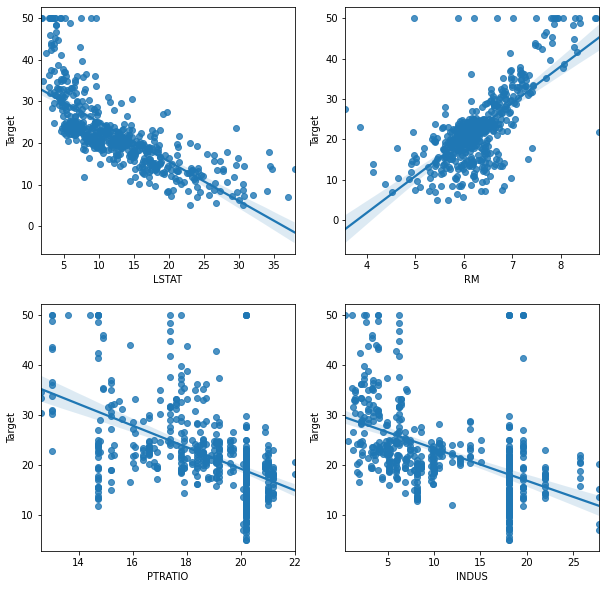

In [33]:
plot_cols = ['Target', 'LSTAT', 'RM', 'PTRATIO', 'INDUS']
#상위 4개로 다시 추출
plot_df = df.loc[:, plot_cols]
#regplot으로 선형회귀선 표시
plt.figure(figsize = (10, 10))
for idx, col in enumerate(plot_cols[1:]):
    ax1 = plt.subplot(2, 2, idx+1)
    sns.regplot(x=col, y=plot_cols[0], data=plot_df, ax=ax1)
plt.show()
#대충 보니까 LSTAT, RM이 젤 정확한 듯 하다.

In [34]:
#피처 스케일링
#원래 데이터 값
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [35]:
scaler=MinMaxScaler()

df_scaled=df.iloc[:, :-1]   #마지막열임을 나타내는 -1은 포함하지 않음
scaler.fit(df_scaled)
df_scaled=scaler.transform(df_scaled)

#스케일링 변환된 값을 데이터프레임에 반영
df.iloc[:, :-1]=df_scaled[:, :]
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,24.0
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,21.6
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,34.7
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,33.4
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,36.2


In [ ]:
#다른 스케일링 기법
#https://datascienceschool.net/03%20machine%20learning/04.03%20%EC%8A%A4%EC%BC%80%EC%9D%BC%EB%A7%81.html
